<a href="https://colab.research.google.com/github/YeissonR21/analisis_exploratorio_de_datos/blob/main/analisis_exploratorio_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
#Importar y cargar datos elegidos
from google.colab import drive;
drive.mount('gdrive')
ruta="/content/gdrive/MyDrive/INSTITUCIONES_EDUCATIVAS_OFICIALES_DE_MUNICIPIOS_DEL_DEPARTAMENTO_DE_BOYACÁ_CON_CONEXION_A_INTERNET_20251124.csv"
data=pd.read_csv(ruta)

Mounted at gdrive


In [ ]:
print (data.shape)
data.head()

(2006, 19)


,CÓDIGO DEPARTAMENTO,DEPARTAMENTO,PROVINCIA,CÓDIGO MUNICIPIO,MUNICIPIO,CODIGO DANE INSTITUCION EDUCATIVA,NOMBRE INSTITUCION EDUCATIVA,CODIGO DANE SEDE,NOMBRE SEDE EDUCATIVA,ZONA,PROYECTOS DE CONECTIVIDAD 2024,OPERADOR,ESTADO,MEDIO DE ENLACE,ANCHO DE BANDA DE SUBIDA (MB),ANCHO DE BANDA DESCARGA (MB),FINALIZACIÓN DEL CONTRATO,LATITUD,LONGITUD
0,15,BOYACÁ,ORIENTE,"15,022",ALMEIDA,"315,022,000,196",I.E. ENRIQUE SUAREZ,"215,022,000,078",ESC EL ROSAL,RURAL,CENTRO DIGITAL,UNIÓN TEMPORAL DE ETB NET COLOMBIA CONECTADA,EN OPERACIÓN,NaN,3.00,12.0,2032 Dec 01 12:00:00 AM,4.94506202,-73.38084868
1,15,BOYACÁ,SUGAMUXI,"15,047",AQUITANIA,"115,047,000,019",I.E. TECNICA RAMON IGNACIO AVELLA,"215,047,000,196",ESC CAJON,RURAL,CENTRO DIGITAL,UNIÓN TEMPORAL DE ETB NET COLOMBIA CONECTADA,PENDIENTE INICIO OPERACIÓN,NaN,3.00,12.0,2032 Dec 01 12:00:00 AM,5.369444,-72.881389
2,15,BOYACÁ,SUGAMUXI,"15,047",AQUITANIA,"115,047,000,019",I.E. TECNICA RAMON IGNACIO AVELLA,"215,047,000,439",ESC DAITO,RURAL,CENTRO DIGITAL,UNIÓN TEMPORAL DE ETB NET COLOMBIA CONECTADA,EN OPERACIÓN,NaN,3.75,15.0,2032 Dec 01 12:00:00 AM,5.498777603,-72.91264973
3,15,BOYACÁ,SUGAMUXI,"15,047",AQUITANIA,"215,047,000,099",I.E. REGION SUR DE AQUITANIA,"215,047,000,579",ESC DIGANOME,RURAL,CENTRO DIGITAL,UNIÓN TEMPORAL DE ETB NET COLOMBIA CONECTADA,PENDIENTE INICIO OPERACIÓN,NaN,3.00,12.0,2032 Dec 01 12:00:00 AM,5.304167,-72.927778
4,15,BOYACÁ,SUGAMUXI,"15,047",AQUITANIA,"115,047,000,019",I.E. TECNICA RAMON IGNACIO AVELLA,"215,047,000,188",ESC EL TOBAL,RURAL,CENTRO DIGITAL,UNIÓN TEMPORAL DE ETB NET COLOMBIA CONECTADA,PENDIENTE INICIO OPERACIÓN,NaN,3.00,12.0,2032 Dec 01 12:00:00 AM,5.508333,-72.869167


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CÓDIGO DEPARTAMENTO                2006 non-null   int64  
 1   DEPARTAMENTO                       2006 non-null   object 
 2   PROVINCIA                          2006 non-null   object 
 3   CÓDIGO MUNICIPIO                   2006 non-null   object 
 4   MUNICIPIO                          2006 non-null   object 
 5   CODIGO DANE INSTITUCION EDUCATIVA  2006 non-null   object 
 6   NOMBRE INSTITUCION EDUCATIVA       2006 non-null   object 
 7   CODIGO DANE SEDE                   2006 non-null   object 
 8   NOMBRE SEDE EDUCATIVA              2006 non-null   object 
 9   ZONA                               2006 non-null   object 
 10  PROYECTOS DE CONECTIVIDAD 2024     2006 non-null   object 
 11  OPERADOR                           2006 non-null   objec

/tmp/ipython-input-3097845287.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-3097845287.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-3097845287.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')


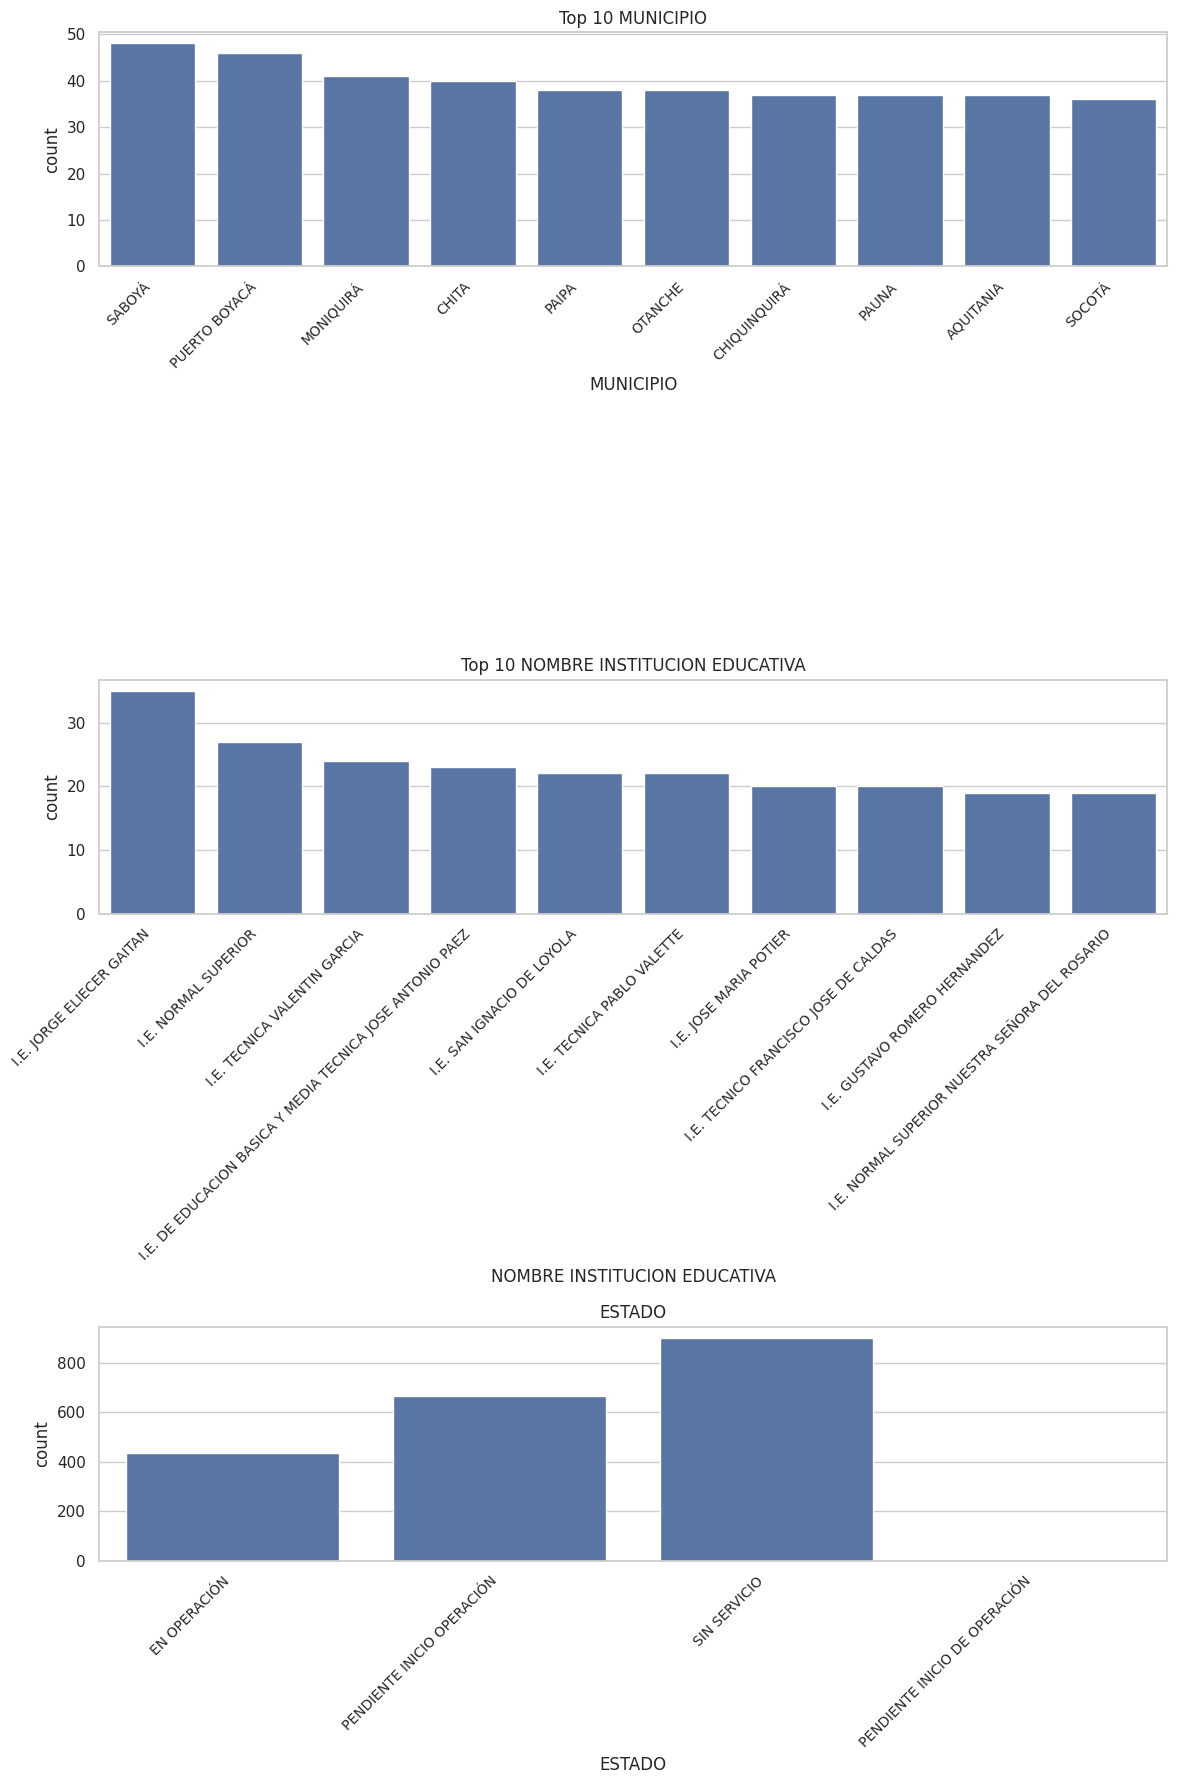

In [ ]:
col_cat=['MUNICIPIO','NOMBRE INSTITUCION EDUCATIVA','ESTADO']

fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(12, 18))
fig.subplots_adjust(hspace=0.8)

for i, col in enumerate(col_cat):
    if col == 'MUNICIPIO' or col == 'NOMBRE INSTITUCION EDUCATIVA':

        top_categories = data[col].value_counts().nlargest(10).index
        sns.countplot(x=col, data=data[data[col].isin(top_categories)], ax=ax[i], order=top_categories)
        ax[i].set_title(f'Top 10 {col}')
    else:

        sns.countplot(x=col, data=data, ax=ax[i])
        ax[i].set_title(col)

    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
    ax[i].tick_params(axis='x', labelsize=10)

plt.tight_layout()
plt.show()

#Limpieza
Revisar valores faltantes, filas duplicadas y tipos de datos en el DataFrame `data` para obtener un resumen de la calidad de los datos y determinar si se requieren acciones de limpieza.
---
Identificar y cuantificar los valores faltantes en cada columna del DataFrame para entender la completitud de los datos.

In [ ]:
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print("Valores faltantes por columna:")
print(missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))


Valores faltantes por columna:
                               Missing Count  Missing Percentage
MEDIO DE ENLACE                         1883           93.868395
ANCHO DE BANDA DE SUBIDA (MB)           1202           59.920239
ANCHO DE BANDA DESCARGA (MB)             902           44.965105
FINALIZACIÓN DEL CONTRATO                902           44.965105
LATITUD                                   80            3.988036
LONGITUD                                  80            3.988036


## Revisar filas duplicadas


Detectar y contar las filas completamente duplicadas en el DataFrame para evitar sesgos en el análisis.


Para detectar y contar las filas completamente duplicadas en el DataFrame `data`, se utilizará el método `duplicated()` en combinación con `sum()` para obtener el recuento total. Esto permitirá identificar cuántas filas son repeticiones exactas de otras filas existentes.

In [ ]:
num_duplicated_rows = data.duplicated().sum()
print(f"Número total de filas duplicadas: {num_duplicated_rows}")

Número total de filas duplicadas: 0


## Verificar tipos de datos


Confirmar los tipos de datos de cada columna para asegurar que sean apropiados para el análisis y detectar posibles inconsistencias.


## Resumen de limpieza de datos


Proporcionar un resumen de los hallazgos de la revisión de valores faltantes, duplicados y tipos de datos, e indicar si se requiere alguna acción de limpieza específica.


# Task
Analyze the distribution of 'ANCHO DE BANDA DE SUBIDA (MB)' and 'ANCHO DE BANDA DESCARGA (MB)' through histograms and descriptive statistics, explore key categorical variables ('ZONA', 'OPERADOR', 'PROYECTOS DE CONECTIVIDAD 2024') using bar charts, and investigate the relationship between 'ANCHO DE BANDA DESCARGA (MB)' and 'ZONA'/'OPERADOR' using appropriate visualizations, finally summarizing the key findings from these descriptive analyses of the dataset `INSTITUCIONES_EDUCATIVAS_OFICIALES_DE_MUNICIPIOS_DEL_DEPARTAMENTO_DE_BOYACÁ_CON_CONEXION_A_INTERNET_20251124.csv`.

## Análisis de Distribución de Ancho de Banda


Generar histogramas y estadísticas descriptivas para las columnas 'ANCHO DE BANDA DE SUBIDA (MB)' y 'ANCHO DE BANDA DESCARGA (MB)'.


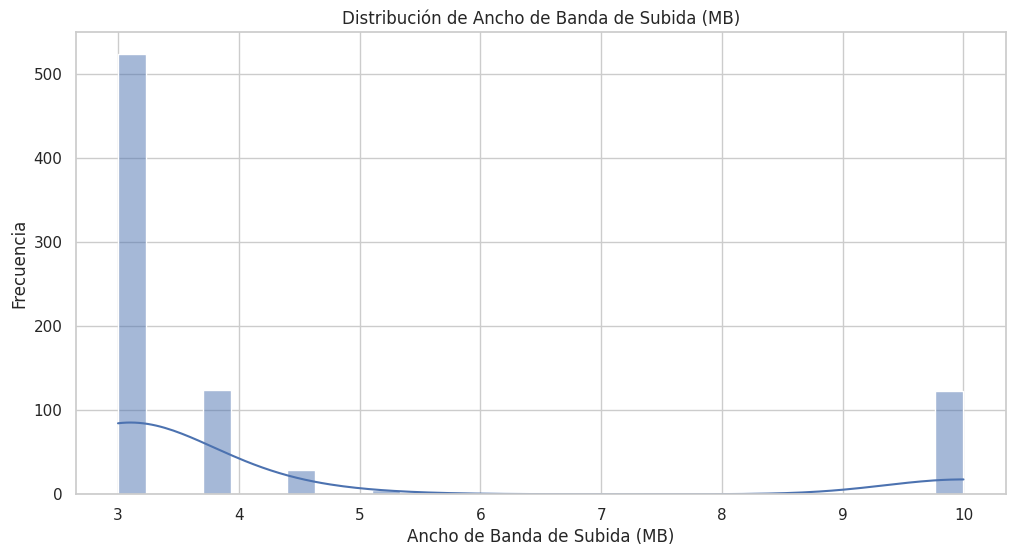

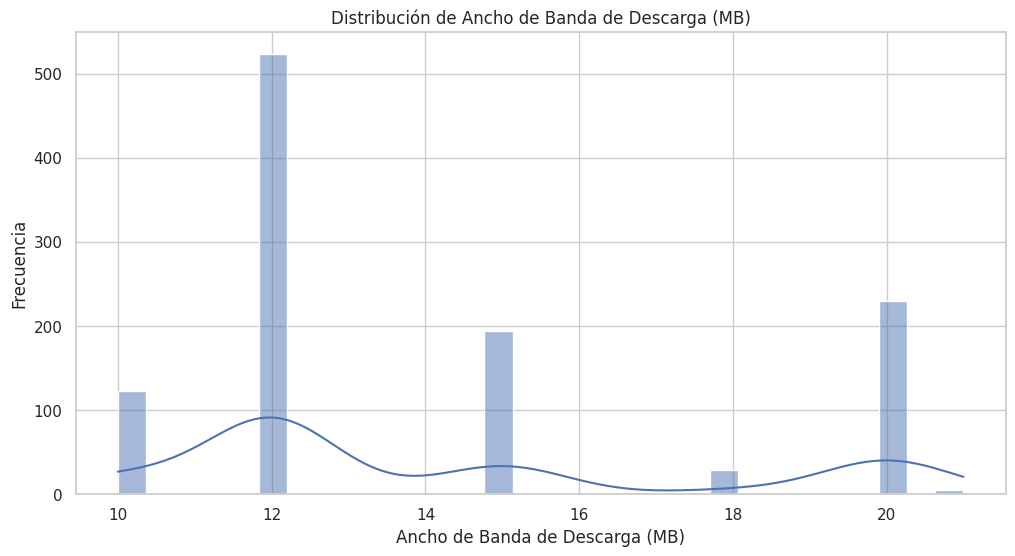

Estadísticas Descriptivas para 'ANCHO DE BANDA DE SUBIDA (MB)':
count    804.000000
mean       4.254664
std        2.475703
min        3.000000
25%        3.000000
50%        3.000000
75%        3.750000
max       10.000000
Name: ANCHO DE BANDA DE SUBIDA (MB), dtype: float64

Estadísticas Descriptivas para 'ANCHO DE BANDA DESCARGA (MB)':
count    1104.000000
mean       14.169384
std         3.460871
min        10.000000
25%        12.000000
50%        12.000000
75%        15.000000
max        21.000000
Name: ANCHO DE BANDA DESCARGA (MB), dtype: float64


In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['ANCHO DE BANDA DE SUBIDA (MB)'].dropna(), bins=30, kde=True)
plt.title('Distribución de Ancho de Banda de Subida (MB)')
plt.xlabel('Ancho de Banda de Subida (MB)')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['ANCHO DE BANDA DESCARGA (MB)'].dropna(), bins=30, kde=True)
plt.title('Distribución de Ancho de Banda de Descarga (MB)')
plt.xlabel('Ancho de Banda de Descarga (MB)')
plt.ylabel('Frecuencia')
plt.show()

print("Estadísticas Descriptivas para 'ANCHO DE BANDA DE SUBIDA (MB)':")
print(data['ANCHO DE BANDA DE SUBIDA (MB)'].describe())
print("\nEstadísticas Descriptivas para 'ANCHO DE BANDA DESCARGA (MB)':")
print(data['ANCHO DE BANDA DESCARGA (MB)'].describe())

## Exploración de Variables Categóricas Clave


Crear gráficos de barras (count plots) para variables categóricas como 'ZONA', 'OPERADOR' y 'PROYECTOS DE CONECTIVIDAD 2024'.


/tmp/ipython-input-2480163890.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=axes[i], palette='viridis')
/tmp/ipython-input-2480163890.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=axes[i], palette='viridis')
/tmp/ipython-input-2480163890.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=axes[i], palette='viridis')


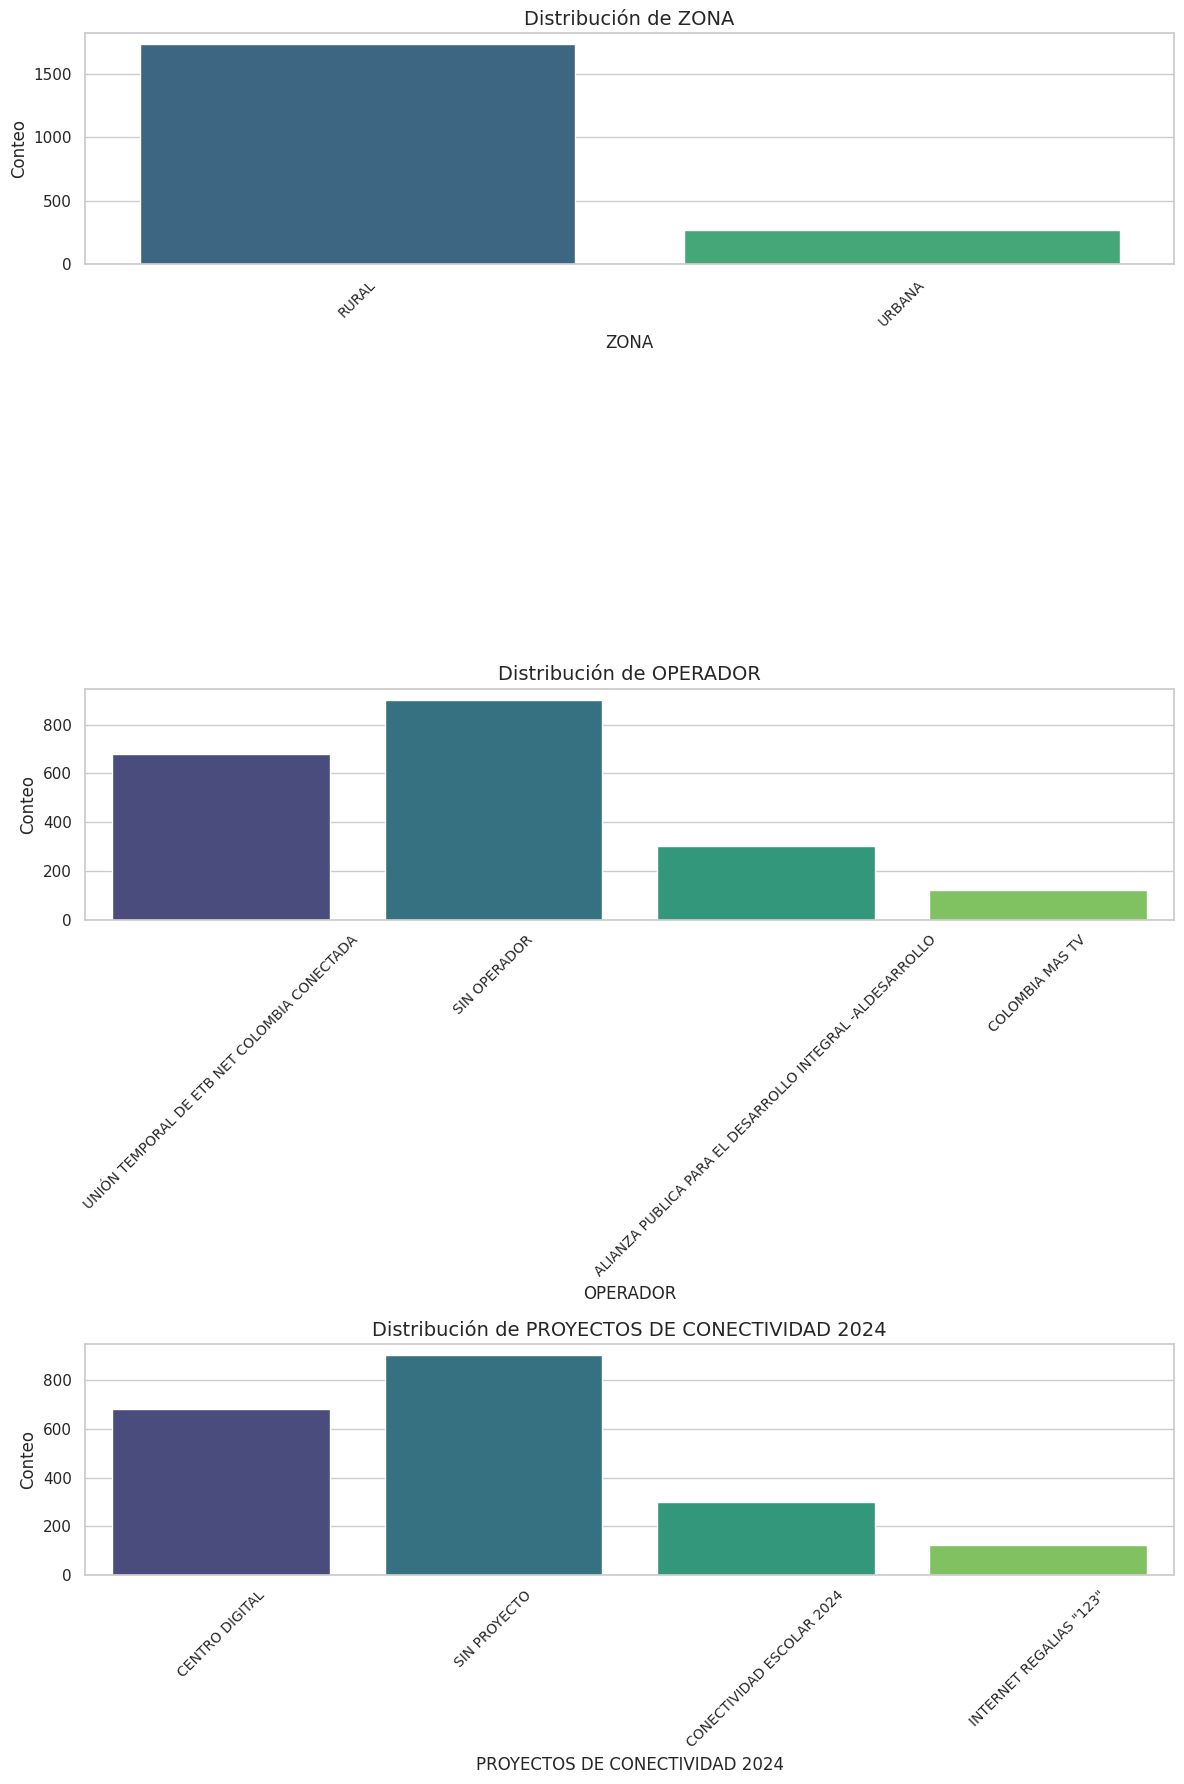

In [ ]:
col_cat_to_plot = ['ZONA', 'OPERADOR', 'PROYECTOS DE CONECTIVIDAD 2024']

fig, axes = plt.subplots(nrows=len(col_cat_to_plot), ncols=1, figsize=(12, 6 * len(col_cat_to_plot)))
fig.subplots_adjust(hspace=0.8)

for i, col in enumerate(col_cat_to_plot):
    sns.countplot(x=col, data=data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribución de {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Conteo', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)

plt.tight_layout()
plt.show()

/tmp/ipython-input-4167644691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ZONA', y='ANCHO DE BANDA DESCARGA (MB)', data=data, palette='coolwarm')


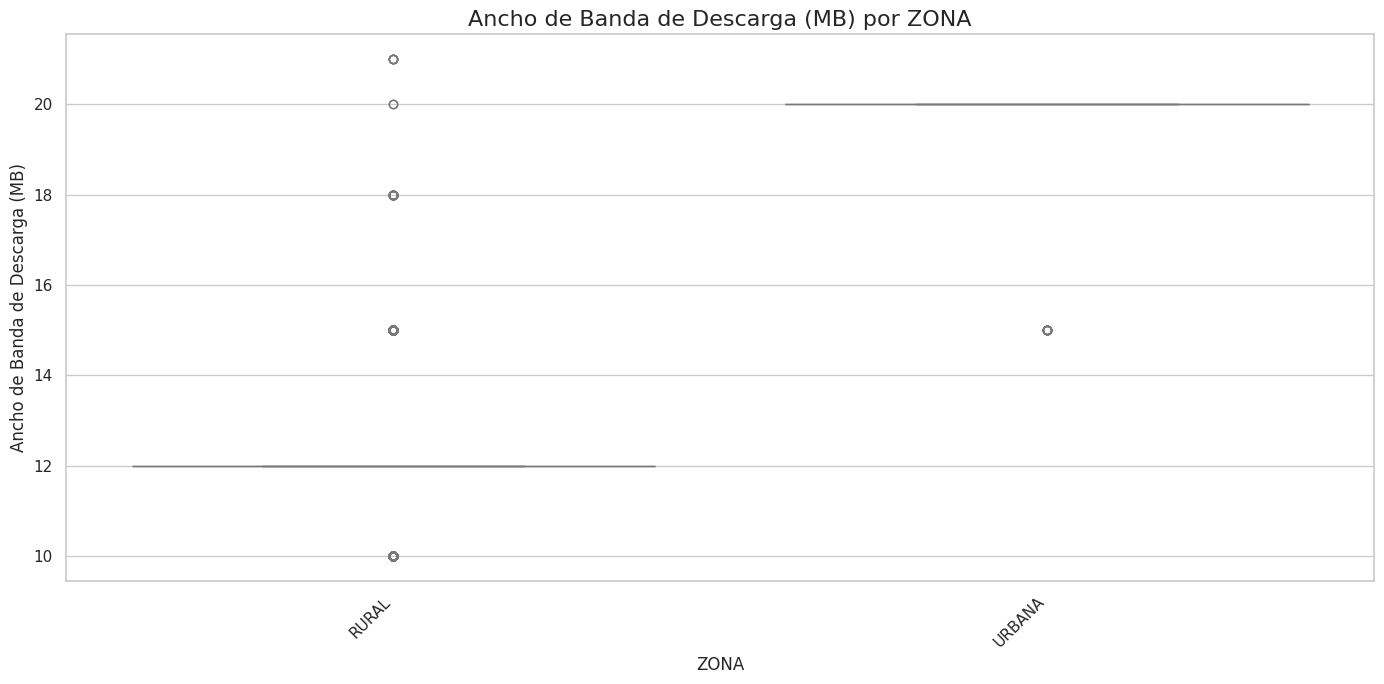

/tmp/ipython-input-4167644691.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OPERADOR', y='ANCHO DE BANDA DESCARGA (MB)', data=data, palette='coolwarm')


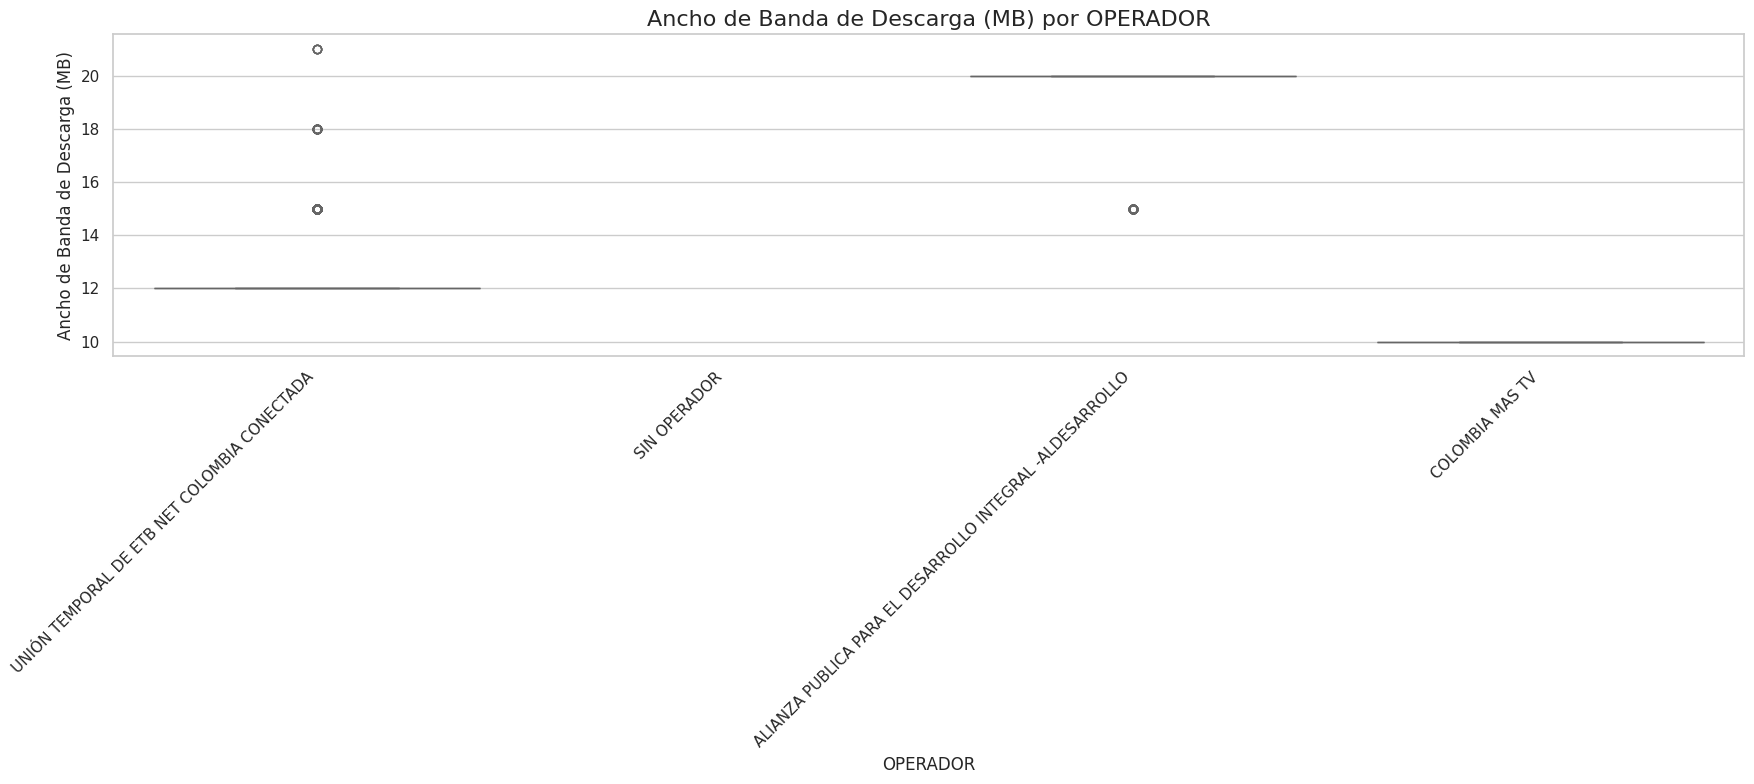

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='ZONA', y='ANCHO DE BANDA DESCARGA (MB)', data=data, palette='coolwarm')
plt.title('Ancho de Banda de Descarga (MB) por ZONA', fontsize=16)
plt.xlabel('ZONA', fontsize=12)
plt.ylabel('Ancho de Banda de Descarga (MB)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 8))
sns.boxplot(x='OPERADOR', y='ANCHO DE BANDA DESCARGA (MB)', data=data, palette='coolwarm')
plt.title('Ancho de Banda de Descarga (MB) por OPERADOR', fontsize=16)
plt.xlabel('OPERADOR', fontsize=12)
plt.ylabel('Ancho de Banda de Descarga (MB)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#Observaciones finales

## Observaciones Finales del Análisis

Después de explorar los datos de conectividad en las instituciones educativas de Boyacá, estos son los puntos clave encontrados:

### Sobre el Ancho de Banda:
*   **Internet de subida (para enviar información)**: La mayoría de las instituciones tienen una velocidad de subida bastante básica. Esto significa que les costaría más enviar archivos grandes o realizar videoconferencias fluidas. La velocidad promedio es de alrededor de 4.25 MB, y el 75% no supera los 3.75 MB, lo que indica que es un recurso limitado para muchas escuelas.
*   **Internet de bajada (para recibir información)**: La velocidad de descarga es mejor, con un promedio de casi 14.17 MB. Esto es bueno para navegar por internet y ver videos. La mayoría de las instituciones se encuentran en un rango de 12 a 15 MB, lo que sugiere una base sólida para el consumo de contenido.

### Sobre las Zonas, Operadores y Proyectos:
*   **Zonas**: Muchas de las instituciones que analizamos se encuentran en **zonas rurales**. Esto es importante porque las necesidades de conectividad en estas áreas suelen ser distintas y más desafiantes que en las urbanas.
*   **Operador Principal**: Hay un actor dominante en la provisión de internet: la **'UNIÓN TEMPORAL DE ETB NET COLOMBIA CONECTADA'**. Esto podría significar que muchas escuelas dependen de un solo proveedor, lo cual tiene sus ventajas (coordinación) y desventajas (poca competencia).
*   **Proyectos de Conectividad**: El programa **'CENTRO DIGITAL'** es el que más se ve en nuestros datos. Esto demuestra que este proyecto es fundamental para llevar internet a las escuelas de la región.


En resumen, los datos muestran que la conectividad en las escuelas de Boyacá se enfoca principalmente en la descarga de información, con una presencia significativa en áreas rurales y una fuerte dependencia de un operador y proyecto específicos. Aunque las velocidades básicas parecen distribuirse de manera relativamente uniforme entre zonas, la calidad y el rango de las velocidades pueden variar mucho según el operador.